In [1]:
import os
import sys

PROJECT_ROOT = os.path.abspath(os.path.join(
                  os.path.abspath('..'),
                  os.pardir)
)
sys.path.append(PROJECT_ROOT)

# Imports
import numpy as np
import matplotlib.pyplot as plt
from electronTransportCode.SimOptions import WaterPhantomSimulation
from electronTransportCode.SimulationDomain import SimulationDomain
from electronTransportCode.MCParticleTracer import AnalogParticleTracer, MCParticleTracer
from electronTransportCode.MCEstimator import DoseEstimator
from electronTransportCode.ProjectUtils import ERE
from electronTransportCode.ParticleModel import SimplifiedEGSnrcElectron
from electronTransportCode.ProjectUtils import E_THRESHOLD, Z_WATER_EFF
from electronTransportCode.Material import WaterMaterial, Material
%matplotlib widget

In [2]:
import pickle

with open('data/particleTracer.pkl', 'rb') as file:
    particleTracer = pickle.load(file)
    
with open('data/doseEstimator.pkl', 'rb') as file:
    doseEstimator = pickle.load(file)
    
simDomain = particleTracer.simDomain
particle = particleTracer.particle

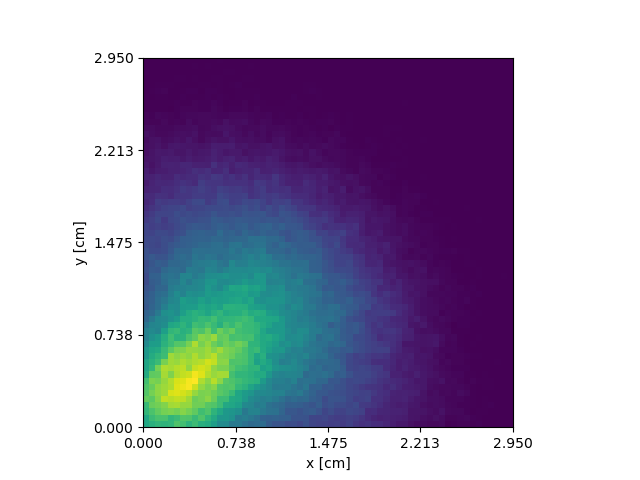

In [3]:
# Plot energy deposition in a subdomain
startIndex = 50; endIndex = 110
xBins = np.linspace(-2.5, 7.5, 201)

energyDeposition_ERE = np.reshape(doseEstimator.scoreMatrix, (simDomain.ybins, simDomain.xbins) )
energyDeposition_ERE = np.flipud(energyDeposition_ERE[startIndex:endIndex,startIndex:endIndex])
x = xBins[startIndex:endIndex]

fig = plt.figure(1)
ax = fig.add_subplot(111)
ax.matshow(energyDeposition_ERE, extent=[x.min(), x.max(), x.min(), x.max()])
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(x.min(), x.max(), 5))
ax.xaxis.tick_bottom()
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
plt.show()

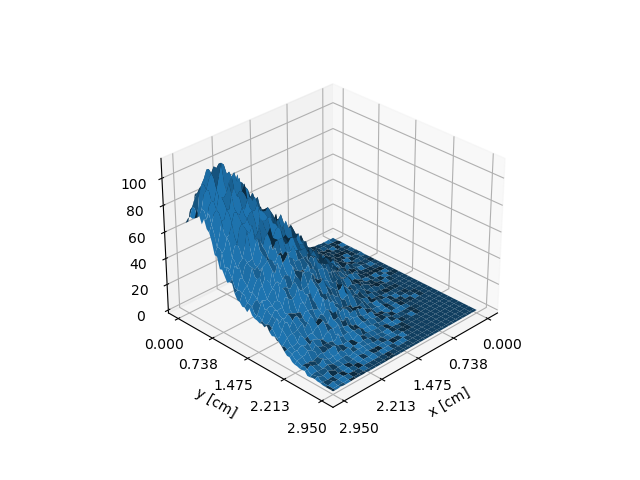

In [4]:
fig = plt.figure(2)
ax = plt.axes(projection="3d")
x2D = np.outer(x, np.ones(len(x)))
ax.plot_surface(x2D, x2D.copy().T, energyDeposition_ERE)
ax.set_xticks(np.linspace(x.min(), x.max(), 5))
ax.set_yticks(np.linspace(x.min(), x.max(), 5))
ax.xaxis.tick_bottom()
ax.set_xlabel('x [cm]')
ax.set_ylabel('y [cm]')
ax.view_init(30, 45)
plt.show()

Text(0.5, 1.0, 'Deposition along diagonal')

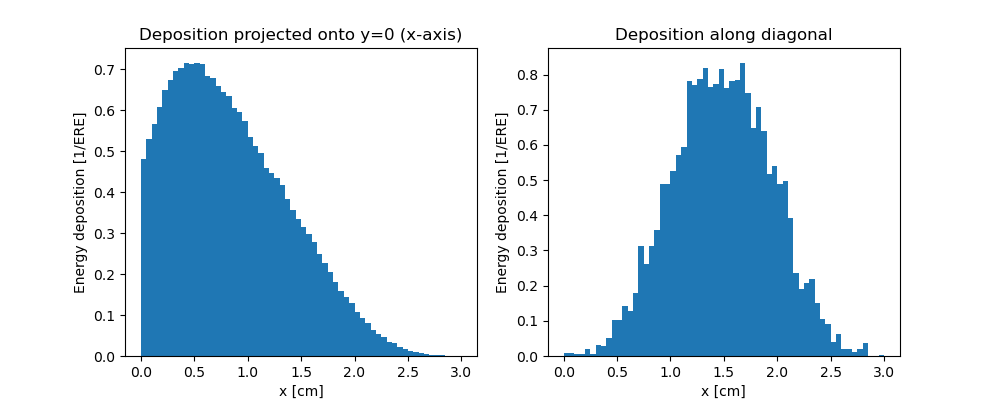

In [5]:
dx = x[1]-x[0]
xEnergyDeposition_ERE = energyDeposition_ERE.sum(axis=0)
xyEnergyDeposition_ERE = np.array([energyDeposition_ERE[i, i] for i in range(len(energyDeposition_ERE))])
xEnergyDeposition_norm = xEnergyDeposition_ERE/(dx*xEnergyDeposition_ERE.sum())
xyEnergyDeposition_norm = xyEnergyDeposition_ERE/(dx*xyEnergyDeposition_ERE.sum())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
ax1.bar(x, xEnergyDeposition_norm, width=dx, align='edge')
ax1.set_xlabel('x [cm]')
ax1.set_ylabel('Energy deposition [1/ERE]')
ax1.set_title('Deposition projected onto y=0 (x-axis)')

ax2.bar(x, xyEnergyDeposition_norm, width=dx, align='edge')
ax2.set_xlabel('x [cm]')
ax2.set_ylabel('Energy deposition [1/ERE]')
ax2.set_title('Deposition along diagonal')

In [6]:
sum(xEnergyDeposition_norm*dx)

0.9999999999999994